<a href="https://colab.research.google.com/github/raj-027/MDSC-302-P-/blob/main/24040208005_MDSC_302(P)_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch

In [47]:
 data_path = '../data-unversioned/p1ch7/'
 cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
 cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

In [48]:
all_datasets = dir(datasets)

# Filter out private and built-in attributes
dataset_names = [name for name in all_datasets if not name.startswith('_')]

print("Datasets available in torchvision.datasets:")
for name in dataset_names:
    print(name)

Datasets available in torchvision.datasets:
CIFAR10
CIFAR100
CLEVRClassification
CREStereo
Caltech101
Caltech256
CarlaStereo
CelebA
Cityscapes
CocoCaptions
CocoDetection
Country211
DTD
DatasetFolder
EMNIST
ETH3DStereo
EuroSAT
FER2013
FGVCAircraft
FakeData
FallingThingsStereo
FashionMNIST
Flickr30k
Flickr8k
Flowers102
FlyingChairs
FlyingThings3D
Food101
GTSRB
HD1K
HMDB51
INaturalist
ImageFolder
ImageNet
Imagenette
InStereo2k
KMNIST
Kinetics
Kitti
Kitti2012Stereo
Kitti2015Stereo
KittiFlow
LFWPairs
LFWPeople
LSUN
LSUNClass
MNIST
Middlebury2014Stereo
MovingMNIST
Omniglot
OxfordIIITPet
PCAM
PhotoTour
Places365
QMNIST
RenderedSST2
SBDataset
SBU
SEMEION
STL10
SUN397
SVHN
SceneFlowStereo
Sintel
SintelStereo
StanfordCars
UCF101
USPS
VOCDetection
VOCSegmentation
VisionDataset
WIDERFace
caltech
celeba
cifar
cityscapes
clevr
coco
country211
dtd
eurosat
fakedata
fer2013
fgvc_aircraft
flickr
flowers102
folder
food101
gtsrb
hmdb51
imagenet
imagenette
inaturalist
kinetics
kitti
lfw
lsun
mnist
moving_m

In [49]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [50]:
len(cifar10), len(cifar10_val)

(50000, 10000)

In [51]:
class_names = cifar10.classes

In [52]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

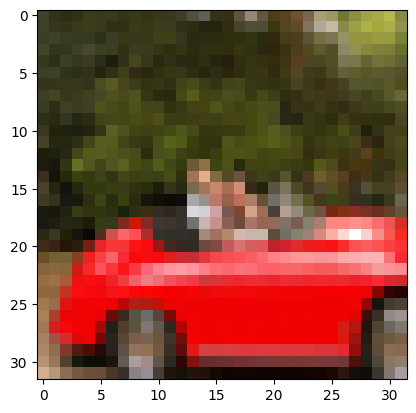

In [53]:
plt.imshow(img)
plt.show()

In [54]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [55]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
transform=transforms.ToTensor())

In [56]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [57]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [58]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

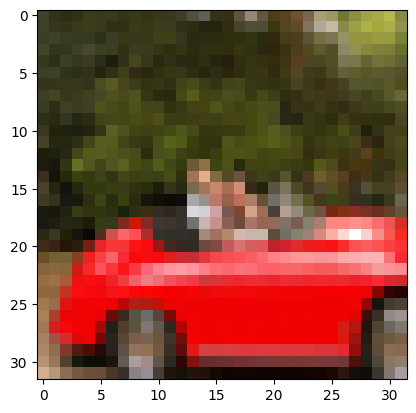

In [59]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

Normalize Data

In [60]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [61]:
imgs.view(3,-1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [62]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [63]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [64]:
transformed_cifar10 = datasets.CIFAR10(
 data_path, train=True, download=False,transform=transforms.Compose([
 transforms.ToTensor(),
 transforms.Normalize((0.4915, 0.4823, 0.4468),
 (0.2470, 0.2435, 0.2616))
 ]))

In [65]:
img_t, _ = transformed_cifar10[99]

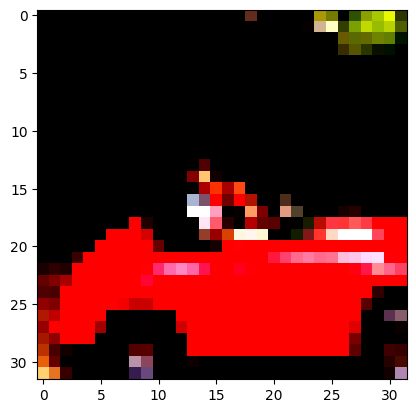

In [66]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [67]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [68]:
import torch.nn as nn

In [69]:
n_out = 2
model = nn.Sequential(nn.Linear(3072,512,),nn.Tanh(), nn.Linear(512,n_out))

In [70]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

In [71]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [72]:
softmax(x).sum()

tensor(1.)

In [73]:
softmax = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0],[1.0, 2.0, 3.0]])


In [74]:
model = nn.Sequential(
nn.Linear(3072, 512),
nn.Tanh(),
nn.Linear(512, 2),
nn.Softmax(dim=1))

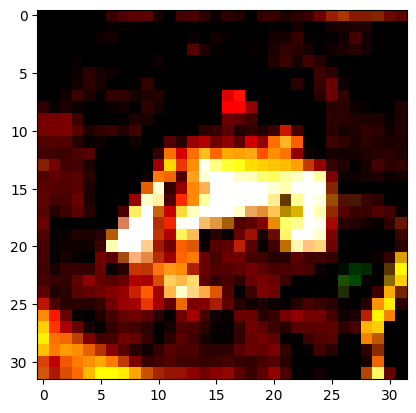

In [75]:
img_t, _ = transformed_cifar10[0]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [76]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_batch = img_t.view(-1).unsqueeze(0)

In [77]:
out = model(img_batch)
out

tensor([[0.4369, 0.5631]], grad_fn=<SoftmaxBackward0>)

In [78]:
_, index = torch.max(out, dim=1)

In [79]:
model = nn.Sequential(
nn.Linear(3072, 512),
nn.Tanh(),
nn.Linear(512, 2),
nn.LogSoftmax(dim=1))

In [80]:
loss = nn.NLLLoss()

In [81]:
img, label = cifar2[0]

In [82]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

In [83]:
img, label = cifar2[0]
img_t = transform(img) # Apply the transform to the image from cifar2
out = model(img_t.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.6686, grad_fn=<NllLossBackward0>)

In [84]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()

n_epochs = 30
loss_history = [] # Initialize a list to store loss history

# Define the transformation as before
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
])

for epoch in range(n_epochs):
    for img, label in cifar2:
        # Apply the transformation to the image
        img_t = transform(img)
        out = model(img_t.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
    loss_history.append(float(loss)) # Append the loss to the history list

Epoch: 0, Loss: 5.707824
Epoch: 1, Loss: 6.994568
Epoch: 2, Loss: 10.344081
Epoch: 3, Loss: 3.958533
Epoch: 4, Loss: 10.527205
Epoch: 5, Loss: 3.155240
Epoch: 6, Loss: 7.293688
Epoch: 7, Loss: 6.313790
Epoch: 8, Loss: 11.930651
Epoch: 9, Loss: 10.432860
Epoch: 10, Loss: 16.378349
Epoch: 11, Loss: 13.973559
Epoch: 12, Loss: 2.754062
Epoch: 13, Loss: 13.877843
Epoch: 14, Loss: 5.569172
Epoch: 15, Loss: 12.311777
Epoch: 16, Loss: 8.904226
Epoch: 17, Loss: 12.876167
Epoch: 18, Loss: 7.938213
Epoch: 19, Loss: 7.525062
Epoch: 20, Loss: 1.898831
Epoch: 21, Loss: 10.001534
Epoch: 22, Loss: 11.634034
Epoch: 23, Loss: 8.832251
Epoch: 24, Loss: 12.033226
Epoch: 25, Loss: 9.251038
Epoch: 26, Loss: 10.976120
Epoch: 27, Loss: 8.638502
Epoch: 28, Loss: 25.393070
Epoch: 29, Loss: 10.822124


In [85]:
conv = nn.Conv2d(3, 16, kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [86]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [90]:
img, _ = cifar2[0]
# Convert the PIL Image to a PyTorch tensor
img_t = transforms.ToTensor()(img)
output = conv(img_t.unsqueeze(0))
img_t.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

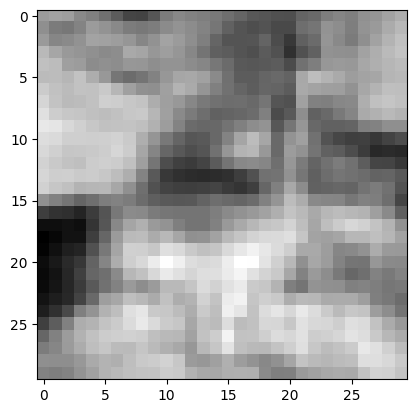

In [91]:
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [93]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
# Convert the PIL Image to a PyTorch tensor
img_t = transforms.ToTensor()(img)
output = conv(img_t.unsqueeze(0))
img_t.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [94]:
with torch.no_grad():
  conv.bias.zero_()
with torch.no_grad():
  conv.weight.fill_(1.0 / 9.0)

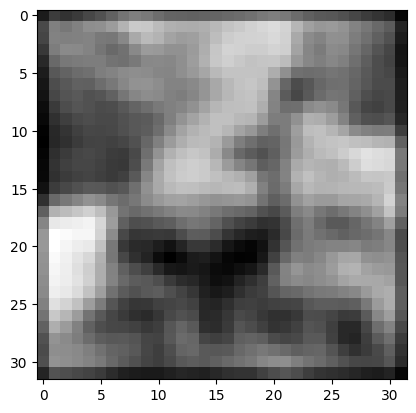

In [96]:
# Convert the PIL Image to a PyTorch tensor
img_t = transforms.ToTensor()(img)
output = conv(img_t.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [97]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
with torch.no_grad():
  conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
  [-1.0, 0.0, 1.0],
  [-1.0, 0.0, 1.0]])
  conv.bias.zero_()


In [103]:
pool = nn.MaxPool2d(2)
# Convert the PIL Image to a PyTorch tensor
img_t = transforms.ToTensor()(img)
output = pool(img_t.unsqueeze(0))
img_t.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [105]:
model = nn.Sequential(
 nn.Conv2d(3, 16, kernel_size=3, padding=1),
 nn.Tanh(),
 nn.MaxPool2d(2),
 nn.Conv2d(16, 8, kernel_size=3, padding=1),
 nn.Tanh(),
 nn.MaxPool2d(2),
 # ...
 nn.Linear(8 * 8 * 8, 32),
 nn.Tanh(),
 nn.Linear(32, 2))

In [106]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [112]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
    self.act1 = nn.Tanh()
    self.pool1 = nn.MaxPool2d(2)
    self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
    self.act2 = nn.Tanh()
    self.pool2 = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(8 * 8 * 8, 32)
    self.act3 = nn.Tanh()
    self.fc2 = nn.Linear(32, 2)

  def forward(self, x):
    out = self.pool1(self.act1(self.conv1(x)))
    out = self.pool2(self.act2(self.conv2(out)))
    out = out.view(-1, 8 * 8 *8)
    out = self.act3(self.fc1(out))
    out = self.fc2(out)
    return out

In [113]:
model = Net()
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [118]:
import torch.nn.functional as F
class Net(nn.Module):
 def __init__(self):
  super().__init__()
  self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
  self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
  self.fc1 = nn.Linear(8 * 8 * 8, 32)
  self.fc2 = nn.Linear(32, 2)

 def forward(self, x):
  out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
  out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
  out = out.view(-1, 8 * 8 * 8) # This view might cause a shape mismatch
  out = torch.tanh(self.fc1(out))
  out = self.fc2(out)
  return out

In [120]:
model = Net()
# Convert the PIL Image to a PyTorch tensor
img_t = transforms.ToTensor()(img)
model(img_t.unsqueeze(0))

tensor([[-0.0261,  0.1064]], grad_fn=<AddmmBackward0>)

In [122]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
  for epoch in range(1, n_epochs + 1):
    loss_train = 0.0
    for imgs, labels in train_loader:
      outputs = model(imgs)
      loss = loss_fn(outputs, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      loss_train += loss.item()
if epoch == 1 or epoch % 10== 0:
  print('{} Epoch {}, Training loss {}'.format(
  datetime.datetime.now(), epoch,
  loss_train / len(train_loader)))


In [125]:
train_loader = torch.utils.data.DataLoader([(transform(img), label) for img, label in cifar2], batch_size=64,
 shuffle=True)
model = Net() #
optimizer = optim.SGD(model.parameters(), lr=1e-2) #
loss_fn =nn.CrossEntropyLoss() #
training_loop(
n_epochs = 10,
optimizer = optimizer,
model = model,
loss_fn = loss_fn,
train_loader = train_loader,
)

In [128]:
train_loader = torch.utils.data.DataLoader([(transform(img), label) for img, label in cifar2], batch_size=64,
 shuffle=False)
val_loader = torch.utils.data.DataLoader([(transform(img), label) for img, label in cifar2_val], batch_size=64,
 shuffle=False)
def validate(model, train_loader, val_loader):
 for name, loader in [("train", train_loader), ("val", val_loader)]:
   correct = 0
   total = 0

   with torch.no_grad():
    for imgs, labels in loader:
      outputs = model(imgs)
      _, predicted = torch.max(outputs, dim=1)
      total += labels.shape[0]
      correct += int((predicted == labels).sum())

   print("Accuracy {}: {:.2f}".format(name , correct / total))
validate(model, train_loader, val_loader)

Accuracy train: 0.86
Accuracy val: 0.85


In [129]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [130]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(data_path
 + 'birds_vs_airplanes.pt'))

<All keys matched successfully>